###  Understanding Business
Analyze the reasons for negative feedback and give improvement plans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

plt.rcParams['font.sans-serif']=['SimHei'] #Used to display labels normally
plt.rcParams['axes.unicode_minus']=False #Used to display the negative sign normally

In [2]:
path = '/Users/clarawang/Dropbox/Python case/MeiTuan-Project/'
data= pd.read_excel(path+'negative survey dataset_Meituan202012.xlsx') #,encoding='gbk'
print("Summary:")
print(data.shape)

Summary:
(542, 9)


### Cleaning Data
#### 1. extract feedback nag，converted to one-hot：

In [3]:
data['Negative Feedback Tag'] = data['Feedback Tag'].str.split('|')

total_list = []
for i in data['Negative Feedback Tag']:
    for j in i:
        total_list.append(j)
set(total_list)

{'Bad attitude',
 'Delivery timeout',
 'Early delivery',
 'Irregular appearance',
 'No notice on delivery',
 'Not enough meals/Bad meal',
 'Others',
 'Wrong meal',
 'threats'}

- All of negative feedback tag

In [4]:

def judge_1(x):
    total = 0
    for i in x['Negative Feedback Tag']:
        if i == 'Bad attitude':
            total += 1
    return total
data['Bad attitude'] = data.apply(judge_1, axis=1)


def judge_2(x):
    total = 0
    for i in x['Negative Feedback Tag']:
        if i == 'Others':
            total += 1
    return total
data['Others'] = data.apply(judge_2, axis=1)


def judge_3(x):
    total = 0
    for i in x['Negative Feedback Tag']:
        if i == 'Not enough meals/Bad meal':
            total += 1
    return total
data['Not enough meals/Bad meal'] = data.apply(judge_3, axis=1)


def judge_4(x):
    total = 0
    for i in x['Negative Feedback Tag']:
        if i == 'Irregular appearance':
            total += 1
    return total
data['Irregular appearance'] = data.apply(judge_4, axis=1)


def judge_5(x):
    total = 0
    for i in x['Negative Feedback Tag']:
        if i == 'Early delivery':
            total += 1
    return total
data['Early delivery'] = data.apply(judge_5, axis=1)


def judge_6(x):
    total = 0
    for i in x['Negative Feedback Tag']:
        if i == 'No notice on delivery':
            total += 1
    return total
data['No notice on delivery'] = data.apply(judge_6, axis=1)


def judge_7(x):
    total = 0
    for i in x['Negative Feedback Tag']:
        if i == 'Delivery timeout':
            total += 1
    return total
data['Delivery timeout'] = data.apply(judge_7, axis=1)


def judge_8(x):
    total = 0
    for i in x['Negative Feedback Tag']:
        if i == 'Wrong meal':
            total += 1
    return total
data['Wrong meal'] = data.apply(judge_8, axis=1)


def judge_9(x):
    total = 0
    for i in x['Negative Feedback Tag']:
        if i == 'threats':
            total += 1
    return total
data['threats'] = data.apply(judge_9, axis=1)
data.head()

,No,Sites,Deliver Name,Rating,Feedback Tag,Pick Up Order Time,Arrival Time,Waiting Time,Deliver Time,Negative Feedback Tag,Bad attitude,Others,Not enough meals/Bad meal,Irregular appearance,Early delivery,No notice on delivery,Delivery timeout,Wrong meal,threats
0,1,Site E,林*鹏,1,Delivery timeout,2.75,19.88,0.80,68.67,[Delivery timeout],0,0,0,0,0,0,1,0,0
1,2,Site E,张*安,1,Others,0.07,6.87,1.93,6.30,[Others],0,1,0,0,0,0,0,0,0
2,3,Site E,林*健,1,Delivery timeout|Bad attitude,1.45,11.35,0.05,51.88,"[Delivery timeout, Bad attitude]",1,0,0,0,0,0,1,0,0
3,4,Site E,曾*平,1,Delivery timeout,68.32,6.33,0.17,18.93,[Delivery timeout],0,0,0,0,0,0,1,0,0
4,5,Site E,黄*灶,1,Delivery timeout,15.80,12.90,7.23,10.18,[Delivery timeout],0,0,0,0,0,0,1,0,0


#### Outliers
- Standardize:Pick Up Order Time;  Arrival Time ;Waiting Time; Deliver Time

- the number with  >3 or <-3 deleted

In [5]:

std_data =  data[['Pick Up Order Time', 'Arrival Time', 'Waiting Time', 'Deliver Time']]

# Pick Up Order Time_std
std_data['Pick Up Order Time_std'] = (std_data['Pick Up Order Time'] - std_data['Pick Up Order Time'].mean()) / std_data['Pick Up Order Time'].std()
temp_index = std_data[(std_data['Pick Up Order Time_std']>3) | (std_data['Pick Up Order Time_std']<-3)].index
data.drop(index=temp_index, axis=0, inplace=True)

# Arrived Time_std
std_data['Arrival Time_std'] = (std_data['Arrival Time'] - std_data['Arrival Time'].mean()) / std_data['Arrival Time'].std()
temp_index = std_data[(std_data['Arrival Time_std']>3) | (std_data['Arrival Time_std']<-3)].index
data.drop(index=temp_index, axis=0, inplace=True)

# Waiting Time_std
std_data['Waiting Time_std'] = (std_data['Waiting Time'] - std_data['Waiting Time'].mean()) / std_data['Waiting Time'].std()
temp_index = std_data[(std_data['Waiting Time_std']>3) | (std_data['Waiting Time_std']<-3)].index
data.drop(index=temp_index, axis=0, inplace=True)

# Deliver Time_std
std_data['Deliver Time_std'] = (std_data['Deliver Time'] - std_data['Deliver Time'].mean()) / std_data['Deliver Time'].std()
temp_index = std_data[(std_data['Deliver Time_std']>3) | (std_data['Deliver Time_std']<-3)].index
data.drop(index=temp_index, axis=0, inplace=True)

data.head()

/Users/clarawang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/clarawang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/clarawang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,No,Sites,Deliver Name,Rating,Feedback Tag,Pick Up Order Time,Arrival Time,Waiting Time,Deliver Time,Negative Feedback Tag,Bad attitude,Others,Not enough meals/Bad meal,Irregular appearance,Early delivery,No notice on delivery,Delivery timeout,Wrong meal,threats
0,1,Site E,林*鹏,1,Delivery timeout,2.75,19.88,0.80,68.67,[Delivery timeout],0,0,0,0,0,0,1,0,0
1,2,Site E,张*安,1,Others,0.07,6.87,1.93,6.30,[Others],0,1,0,0,0,0,0,0,0
2,3,Site E,林*健,1,Delivery timeout|Bad attitude,1.45,11.35,0.05,51.88,"[Delivery timeout, Bad attitude]",1,0,0,0,0,0,1,0,0
4,5,Site E,黄*灶,1,Delivery timeout,15.80,12.90,7.23,10.18,[Delivery timeout],0,0,0,0,0,0,1,0,0
5,6,Site E,管*,1,Others,41.88,14.03,0.08,5.75,[Others],0,1,0,0,0,0,0,0,0


#### order dataset

In [6]:
data.sort_values(by='No').reset_index(drop=True, inplace=True)
data.head()

,No,Sites,Deliver Name,Rating,Feedback Tag,Pick Up Order Time,Arrival Time,Waiting Time,Deliver Time,Negative Feedback Tag,Bad attitude,Others,Not enough meals/Bad meal,Irregular appearance,Early delivery,No notice on delivery,Delivery timeout,Wrong meal,threats
0,1,Site E,林*鹏,1,Delivery timeout,2.75,19.88,0.80,68.67,[Delivery timeout],0,0,0,0,0,0,1,0,0
1,2,Site E,张*安,1,Others,0.07,6.87,1.93,6.30,[Others],0,1,0,0,0,0,0,0,0
2,3,Site E,林*健,1,Delivery timeout|Bad attitude,1.45,11.35,0.05,51.88,"[Delivery timeout, Bad attitude]",1,0,0,0,0,0,1,0,0
4,5,Site E,黄*灶,1,Delivery timeout,15.80,12.90,7.23,10.18,[Delivery timeout],0,0,0,0,0,0,1,0,0
5,6,Site E,管*,1,Others,41.88,14.03,0.08,5.75,[Others],0,1,0,0,0,0,0,0,0


In [7]:
print(data.shape)

(512, 19)


#### Save after cleaning

### Analysis

#### Analysis idea
Image(filename = "img1.png", width = 600, height = 300)

#### Negative review type perspective
##### Number of negative reviews

in conclusion:
-The main reasons for the complaint are: overtime delivery, bad attitude, other, Not enough meals/Bad meal

-Delivery overtime: It is necessary to further understand the distribution of delivery time and analyze at which stage employees are prone to problems when delivering meals;

-Bad attitude: This type of problem is a serious problem, and the number of complaints is large, indicating that further investigation of the cause of the problem is needed to improve the quality of employee training. For more serious employees who have not corrected themselves after education, corresponding punishment should be considered;

-Others: This kind of problem should be combined with the content of customer evaluation for further understanding;

-Threats: This type of problem is serious, it proves that the situation is true and should be punished.



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


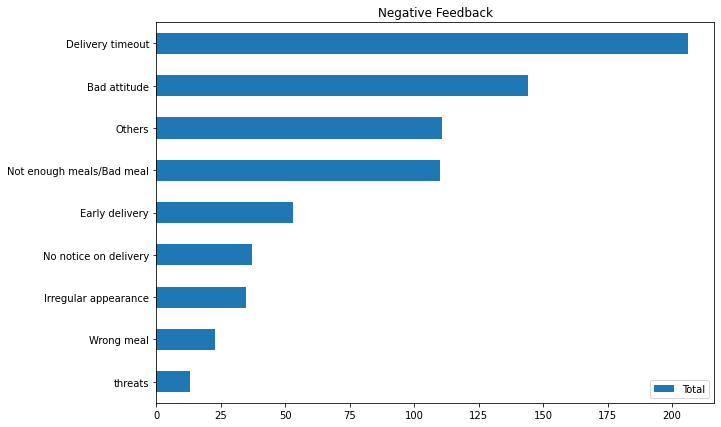

In [8]:
# Number of negative reviews of each type
total_dict = {'Irregular appearance': data['Irregular appearance'].sum(), 
             'Others': data['Others'].sum(),
             'Not enough meals/Bad meal': data['Not enough meals/Bad meal'].sum(),
             'Bad attitude': data['Bad attitude'].sum(),
             'Early delivery': data['Early delivery'].sum(),
             'No notice on delivery': data['No notice on delivery'].sum(),
             'Delivery timeout': data['Delivery timeout'].sum(),
             'Wrong meal': data['Wrong meal'].sum(),
             'threats': data['threats'].sum()}
pd.DataFrame({'Total': total_dict}).sort_values(by='Total').plot(figsize=(10, 7),
                                                  kind='barh',
                                                  title=('Negative Feedback'))
plt.show()

#####  Distribution of pick up  and delivery time

in conclusion:
-Pick Up Order Time: mainly concentrated in 0~5 minutes, the time is relatively short, not the main reason for bad reviews;

-Arrived Time: presents a right-skewed distribution, most of which are concentrated in 0~10 minutes, and a small part of 10-20 minutes or more, indicating that the slow arrival time will have a certain impact on the bad reviews;

-Waiting Time:Mainly focus on 0-10 minutes, which is relatively short, not the main reason for negative reviews

-Delivery time: The average value is around 20 minutes, showing a normal distribution. It can be seen that the fluctuations are large, and the delivery time is overtime, which is the main reason for the negative reviews. The staff needs to be trained for this problem, such as: how to quickly Effectively find customer's address and other aspects;


<AxesSubplot:title={'center':'Delivery timeout-Deliver Time Distribution'}, ylabel='Frequency'>

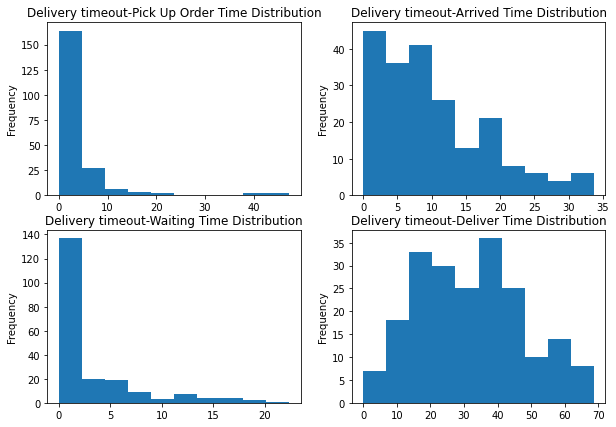

In [9]:

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
# Pick Up Order Time
data[data['Delivery timeout']==1]['Pick Up Order Time'].plot(kind='hist',
                          figsize=(10, 7),
                          title='Delivery timeout-Pick Up Order Time Distribution')
plt.subplot(2,2,2)
# Arrived Time
data[data['Delivery timeout']==1]['Arrival Time'].plot(kind='hist',
                      figsize=(10, 7),
                      title='Delivery timeout-Arrived Time Distribution')
plt.subplot(2,2,3)
# Waiting Time
data[data['Delivery timeout']==1]['Waiting Time'].plot(kind='hist',
                     figsize=(10, 7),
                     title='Delivery timeout-Waiting Time Distribution')
plt.subplot(2,2,4)
# Deliver Time
data[data['Delivery timeout']==1]['Deliver Time'].plot(kind='hist',
                      figsize=(10, 7),
                      title='Delivery timeout-Deliver Time Distribution')


##### Different types of negative feedback, distribution of pick-deliver time
-In the case of overtime delivery, the distribution of delivery time:

Conclusion: similar to the overall distribution;

-In the case of overtime delivery, the delivery time presents a bimodal distribution, mainly concentrated in 20 minutes and 40 minutes, which is the main cause of overtime delivery.

-There are a small number of employees who arrive at the store for more than 15 minutes, which is the secondary cause of overtime delivery.。


#### Site perspective
##### Negative feedback of each site

The negative reviews mainly come from: sites C, A, B,

The distribution of negative reviews on each site is the same as the distribution of negative reviews;

The number of negative reviews per person for each site is not significant;

It can be judged that the number of negative reviews on sites C, A, and B is positively correlated with the number of employees.

It is estimated that the number of restaurants near the C, A, and B sites will be more than that of the D and E sites, and further confirmation is needed.

Suggest:

It is recommended to optimize the distribution and number of sites, and employees only accept takeaway orders from restaurants near the site to reduce the time for employees to pick up meals;

It is recommended to optimize the threshold for determining the delivery timeout. For take-out orders with user addresses far away from the restaurant, employees should be given more delivery time.

In [10]:
zd_count = data.groupby('Sites').agg({'Sites': 'count'})
zd_count

zd_man = data.groupby('Sites').agg({'Deliver Name': 'nunique'})
zd_man

,Deliver Name
Sites,
Site A,99
Site B,95
Site C,134
Site D,46
Site E,23
Site F,40


In [11]:
zd_count = data.groupby('Sites').agg({'Sites': 'count'})
zd_count

,Sites
Sites,
Site A,125
Site B,105
Site C,168
Site D,48
Site E,24
Site F,42


In [12]:
# copy after cleaning data
data.to_excel(path+'negative feedback_clean.xlsx')

<BarContainer object of 6 artists>

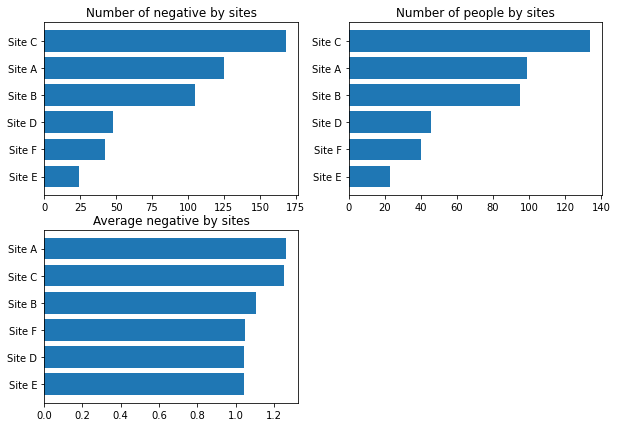

In [13]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
# Number of negative feedback on each site
zd_count = data.groupby('Sites').agg({'Sites': 'count'})
zd_count.columns=['Number of negative']
zd_count = zd_count.sort_values(by='Number of negative')
plt.title('Number of negative by sites')
plt.barh(zd_count.index, zd_count['Number of negative'])

plt.subplot(2,2,2)
# Number of employees with negative reviews on each site
zd_man = data.groupby('Sites').agg({'Deliver Name': 'nunique'})
zd_man.columns=['Number of people']
zd_man.sort_values(by='Number of people', inplace=True)
plt.title('Number of people by sites')
plt.barh(zd_man.index, zd_man['Number of people'])

plt.subplot(2,2,3)
# Number of negative reviews per person per site
zd_avg = zd_count['Number of negative'] /  zd_man['Number of people']
zd_avg = pd.DataFrame({'Average negative': zd_avg}).sort_values(by='Average negative')
plt.title('Average negative by sites')
plt.barh(zd_avg.index, zd_avg['Average negative'])


##### Each site and the number of negative feedback, cross comparison

Same as the general trend, delivery timeout is the main problem of each site.

Among them, the number of overtime bad reviews of site C is significantly higher than that of other sites, which is the focus of rectification.

<AxesSubplot:title={'center':'Sites vs different types of negative feedback'}, xlabel='Sites'>

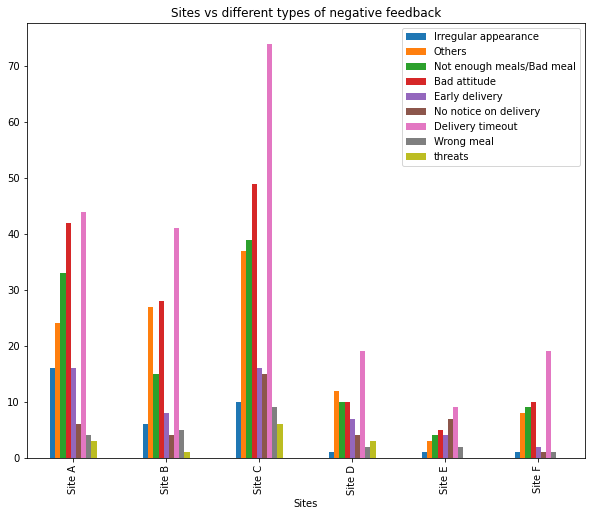

In [14]:
data.groupby('Sites').agg({'Irregular appearance': sum,
                         'Others': sum,
                         'Not enough meals/Bad meal': sum,
                         'Bad attitude': sum,
                         'Early delivery': sum,
                         'No notice on delivery': sum,
                         'Delivery timeout': sum,
                         'Wrong meal': sum,
                         'threats': sum,}).plot(kind='bar', #bar
                                             figsize=(10, 8),
                          title='Sites vs different types of negative feedback')

#### Employee perspective
##### Number and type ranking of negative feedback

According to the ranking situation, the corresponding bad review label statistics, and the corresponding training and punishment for employees.

In [15]:
# Staff perspective
# Negative reviews ranking
man_top = data.groupby('Deliver Name').agg({'Deliver Name': 'count'})
man_top.columns = ['Negative number']
man_top = man_top.sort_values(by='Negative number', ascending=False).iloc[0:10]
man_top
man_else = data.groupby('Deliver Name').agg(sum).iloc[:, 6:]
man_else
man_top.reset_index(drop=False,inplace=True)
man_else.reset_index(drop=False,inplace=True)
man_merge = pd.merge(man_top, man_else, on='Deliver Name')
man_merge

,Deliver Name,Negative number,Bad attitude,Others,Not enough meals/Bad meal,Irregular appearance,Early delivery,No notice on delivery,Delivery timeout,Wrong meal,threats
0,李*,9,2,3,1,0,2,1,4,0,0
1,陈*,7,3,2,0,1,0,0,2,0,0
2,王*,6,2,1,0,1,3,1,2,0,0
3,刘*,5,1,2,0,1,1,0,3,0,0
4,张*,5,1,2,1,0,0,0,1,0,0
5,杨*,5,0,1,1,0,0,0,3,0,0
6,黄*,4,2,0,1,0,0,1,2,0,0
7,伍*燕,4,3,0,0,0,0,1,1,0,0
8,吴*双,3,3,0,0,0,0,0,0,0,0
9,刘*新,3,1,0,1,0,1,0,1,0,0


##### For employees with serious negative reviews, analyze the specific reasons

A total of 13 negative reviews with harassment threat tags.
-Why do employees threaten to harass, need to further contact the user to understand the situation, to find out whether the user is malicious and give a bad review.


In [16]:
# threats
man_harass = data.groupby('Deliver Name').agg({'threats': sum})
man_harass = man_harass[man_harass['threats']!=0]
man_harass.columns = ['threats number']
man_harass

,threats number
Deliver Name,
伍*进,1
何*,1
农*群,1
刘*洋,1
刘*辉,1
唐*彪,1
张*希,1
梁*财,1
潘*霖,1


In [17]:
data[data['threats']>0].drop(['No', 'Rating', 'Feedback Tag'],axis=1)

,Sites,Deliver Name,Pick Up Order Time,Arrival Time,Waiting Time,Deliver Time,Negative Feedback Tag,Bad attitude,Others,Not enough meals/Bad meal,Irregular appearance,Early delivery,No notice on delivery,Delivery timeout,Wrong meal,threats
87,Site C,蒙*昌,1.62,0.30,12.12,30.08,"[Others, Irregular appearance, No notice on de...",1,1,1,1,1,1,1,1,1
134,Site C,伍*进,1.23,11.70,0.15,1.97,"[Not enough meals/Bad meal, threats, Delivery ...",1,1,1,0,1,0,1,0,1
190,Site C,刘*辉,12.55,6.58,10.33,20.08,"[threats, Bad attitude, Not enough meals/Bad m...",1,1,1,0,0,0,0,0,1
201,Site C,梁*财,2.17,20.18,0.05,6.32,"[Delivery timeout, Wrong meal, threats, Not en...",1,0,1,1,1,1,1,1,1
236,Site C,唐*彪,0.00,8.05,2.23,63.85,"[Bad attitude, Irregular appearance, Not enoug...",1,1,1,1,0,0,1,0,1
243,Site C,潘*霖,0.77,30.90,0.02,21.17,"[Not enough meals/Bad meal, Irregular appearan...",1,1,1,1,0,0,1,0,1
296,Site A,何*,0.37,22.70,0.97,4.30,"[Bad attitude, Irregular appearance, Early del...",1,0,0,1,1,0,0,0,1
301,Site A,陈*基,1.63,9.95,0.07,20.50,"[No notice on delivery, Delivery timeout, Wron...",1,1,1,1,1,1,1,1,1
302,Site A,刘*洋,0.68,2.07,2.38,5.12,"[Not enough meals/Bad meal, threats, No notice...",0,0,1,0,0,1,0,0,1
401,Site D,陈*全,1.05,7.22,5.63,19.67,"[Bad attitude, Delivery timeout, threats, Not ...",1,0,1,0,0,0,1,0,1


### Analysis suggestions

Summary and suggestions
1. Analysis result of negative review type perspective:
Most of the reasons for the complaint are: 
overtime delivery, bad attitude, other, small meals

Delivery timeout: According to the distribution of delivery time, among them: Arrived Time and delivery time are prone to problems.
Arrived Time is a secondary issue, and the delivery time is the main issue;

Bad attitude: This type of problem is a serious problem, and the number of complaints is large, indicating that further investigation of the cause of the problem is required to improve the quality of employee training. For more serious employees who have not corrected themselves after repeated education, corresponding punitive measures should be considered;

Others: This kind of problem should be combined with the content of customer evaluation to further understand;

Small meals, early delivery, delivery without notice, irregular appearance, and wrong meals: all belong to the scope of employee training;

Threats: This type of problem is serious, but the number is small. It is necessary to prove that the situation is true and to be punished.

2. Analysis results of each site:
The negative reviews mainly come from: sites C, A, B,
It can be judged that the number of negative reviews on sites C, A, and B is positively correlated with the number of employees.
It is estimated that the number of catering shops attached to sites C, A, and B will be more than that of sites D and E, and further confirmation is needed.
Delivery timeout is the main problem of each site,
Among them, the number of overtime bad reviews of site C is significantly higher than that of other sites, which is the focus of rectification.
It is recommended to optimize the distribution and number of sites, and employees only accept takeaway orders from restaurants near the site to reduce the time for employees to pick up meals;
It is recommended to optimize the threshold for determining the delivery timeout. For take-out orders with user addresses far away from the restaurant, employees should be given more delivery time.

3. Result of analysis from the perspective of employees:
According to the ranking of the number of negative reviews by employees, and the nature and severity, it should be further confirmed, and corresponding training and punishment should be given.

### Further Discuss
- Others feedback anaysis(text feedback)
- other methods for cleaning;
- others method with python language